In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pd.set_option('display.max_columns',400)
df = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
df.head(2)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [3]:
df.shape

(20037, 355)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20037 entries, 0 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.3+ MB


In [5]:
df.duplicated().sum()

14

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                       456
                                       ...  
Q35_B_Part_7                           19542
Q35_B_Part_8                           19176
Q35_B_Part_9                           19503
Q35_B_Part_10                          16940
Q35_B_OTHER                            19771
Length: 355, dtype: int64

In [8]:
df = df[['Time from Start to Finish (seconds)','Q1','Q2','Q3','Q4','Q5','Q6','Q7_Part_1',
       'Q8','Q9_Part_1','Q11','Q13','Q14_Part_1']]

<AxesSubplot:>

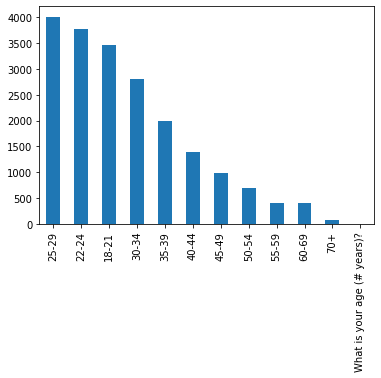

In [9]:
df['Q1'].value_counts().plot(kind='bar')

<AxesSubplot:>

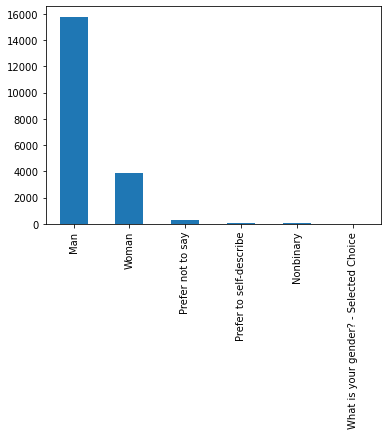

In [10]:
df['Q2'].value_counts().plot(kind='bar')

In [11]:
df['Q2'].value_counts()

Man                                       15775
Woman                                      3878
Prefer not to say                           263
Prefer to self-describe                      54
Nonbinary                                    52
What is your gender? - Selected Choice        1
Name: Q2, dtype: int64

In [12]:
df['Q2'] = df['Q2'].replace({'Prefer to self-describe':'Prefer not to say','Nonbinary':'Prefer not to say',
                             'What is your gender? - Selected Choice':'Prefer not to say'})

<AxesSubplot:>

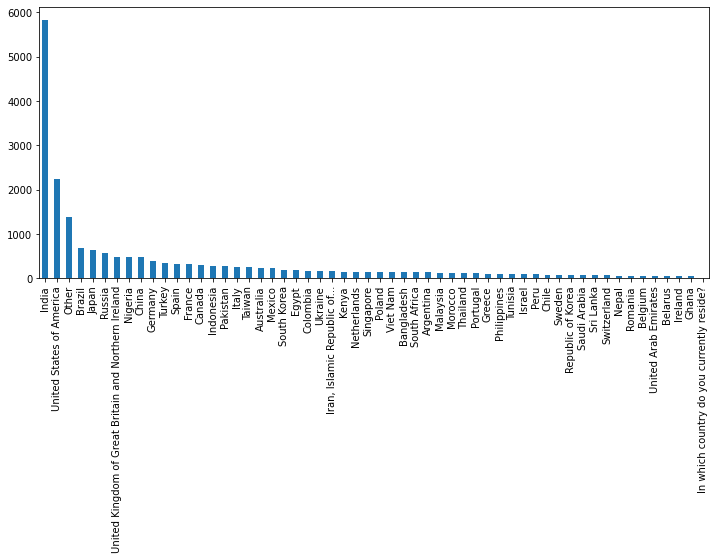

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
df['Q3'].value_counts().plot(kind='bar')

<AxesSubplot:>

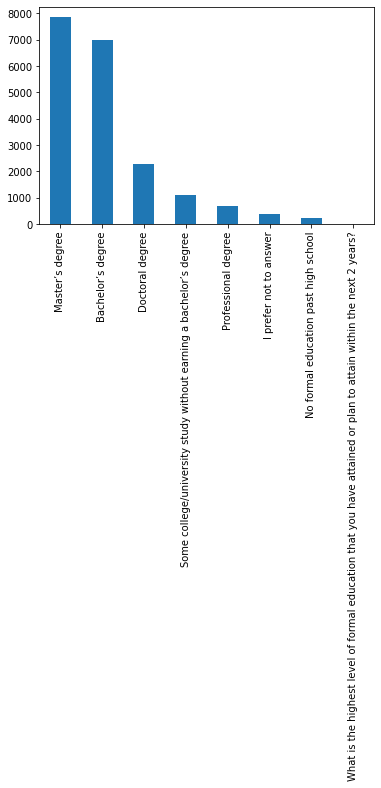

In [14]:
df['Q4'].value_counts().plot(kind='bar')

In [15]:
df['Q4'] = df['Q4'].replace({'No formal education past high school':'I prefer not to answer',
                          'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?':'I prefer not to answer'})

<AxesSubplot:>

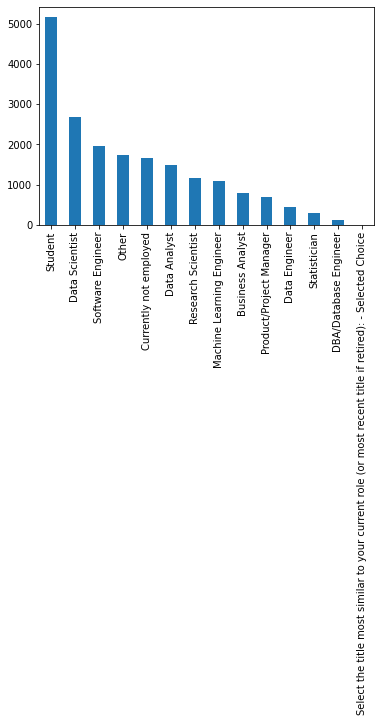

In [16]:
df['Q5'].value_counts().plot(kind='bar')

<AxesSubplot:>

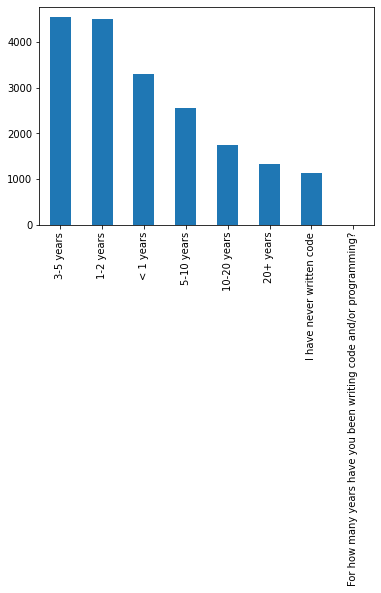

In [17]:
df['Q6'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Q7_Part_1'>

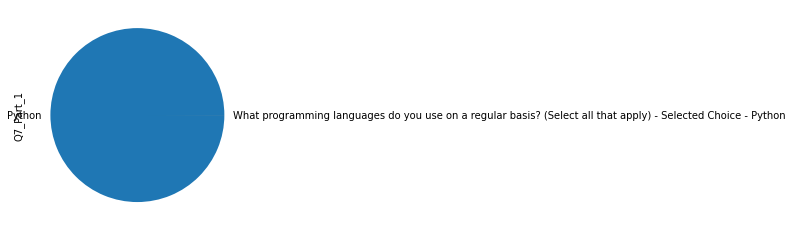

In [18]:
df['Q7_Part_1'].value_counts().plot(kind='pie')

<AxesSubplot:>

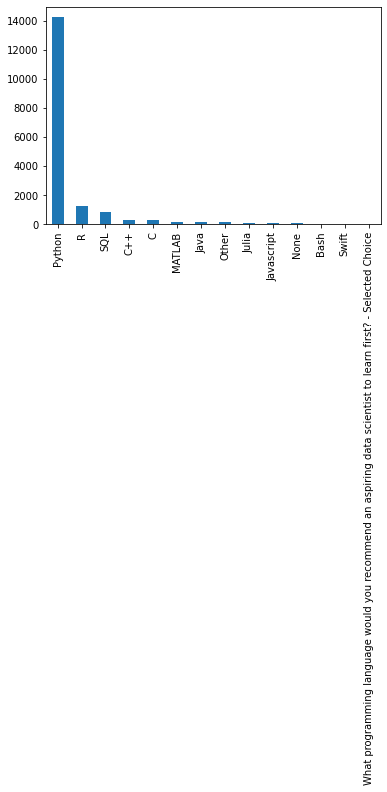

In [19]:
df['Q8'].value_counts().plot(kind='bar')

In [20]:
df['Q8'].replace({'Julia':'Other','Javascript':'Other','None':'Other','Bash':'Other','Swift':'Other',
                'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice':'Other'},inplace=True)

<AxesSubplot:>

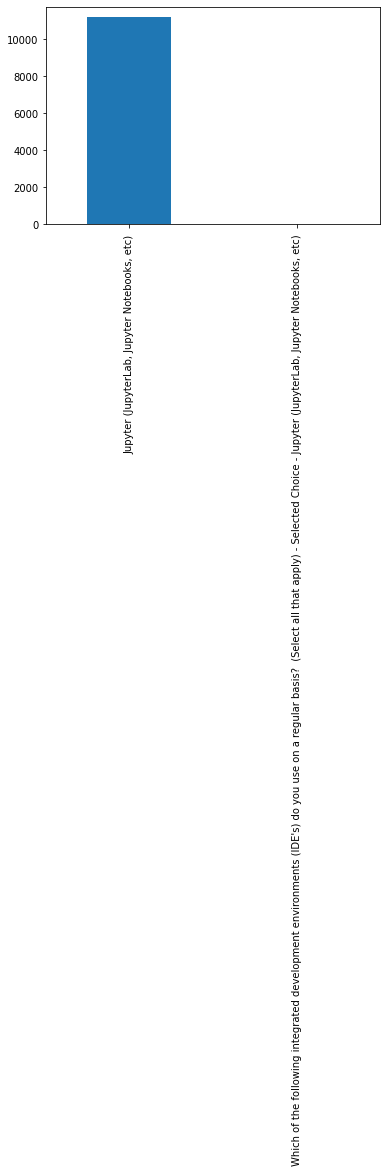

In [21]:
df['Q9_Part_1'].value_counts().plot(kind='bar')

<AxesSubplot:>

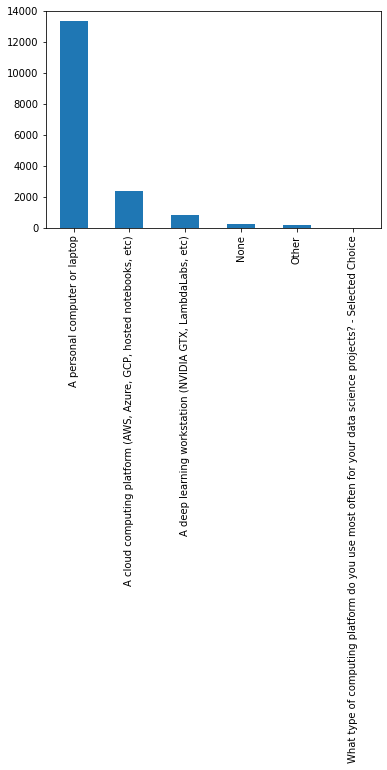

In [22]:
df['Q11'].value_counts().plot(kind='bar')

In [23]:
df['Q11'].value_counts()

A personal computer or laptop                                                                              13348
A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)                                         2358
A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)                                                    834
None                                                                                                         292
Other                                                                                                        197
What type of computing platform do you use most often for your data science projects? - Selected Choice        1
Name: Q11, dtype: int64

In [24]:
df['Q11'].replace({'A personal computer or laptop':'laptop',
                 'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)':'Cloud platform',
                  'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)':'Other',
                 'What type of computing platform do you use most often for your data science projects? - Selected Choice':'Other'},inplace=True)

<AxesSubplot:>

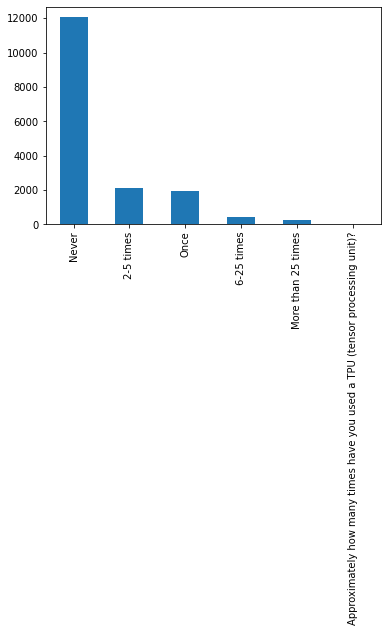

In [25]:
df['Q13'].value_counts().plot(kind='bar')

In [26]:
df['Q13'].value_counts()

Never                                                                         12050
2-5 times                                                                      2112
Once                                                                           1922
6-25 times                                                                      424
More than 25 times                                                              272
Approximately how many times have you used a TPU (tensor processing unit)?        1
Name: Q13, dtype: int64

In [27]:
df['Q13'] = df['Q13'].replace({'Approximately how many times have you used a TPU (tensor processing unit)? ':'more than 6 times',
                                  'More than 25 times':'more than 6 times','6-25 times':'more than 6 times'})

<AxesSubplot:>

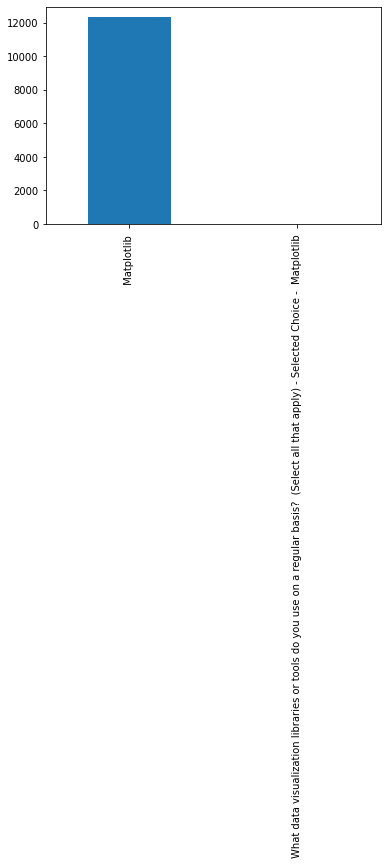

In [28]:
df['Q14_Part_1'].value_counts().plot(kind='bar')

In [29]:
df.drop(['Q14_Part_1','Q9_Part_1','Q7_Part_1','Time from Start to Finish (seconds)'],axis=1,inplace=True)

In [30]:
df.isnull().sum()

Q1        0
Q2        0
Q3        0
Q4      456
Q5      745
Q6      902
Q8     2201
Q11    2993
Q13    3242
dtype: int64

In [31]:
df['Q13'] = df['Q13'].fillna('None')
df['Q11'] = df['Q11'].fillna('None')
df['Q8'] = df['Q8'].fillna('Other')
df['Q6'] = df['Q6'].fillna('None')
df['Q5'] = df['Q5'].fillna('None')
df['Q4'] = df['Q4'].fillna('I prefer not to answer')

In [32]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13
0,What is your age (# years)?,Prefer not to say,In which country do you currently reside?,I prefer not to answer,Select the title most similar to your current ...,For how many years have you been writing code ...,Other,Other,Approximately how many times have you used a T...
1,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,Cloud platform,2-5 times
2,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,laptop,2-5 times
3,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,R,laptop,Never
4,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,Cloud platform,2-5 times


In [33]:
df.rename(columns={'Q1':'age','Q2':'gender','Q3':'country','Q4':'degree',
                  'Q5':'title','Q6':'coding_in_year','Q8':'programming_language',
                  'Q11':'platform','Q13':'usuage'},inplace=True)

In [34]:
df = df.drop([0])

In [35]:
df.head()

,age,gender,country,degree,title,coding_in_year,programming_language,platform,usuage
1,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,Cloud platform,2-5 times
2,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,laptop,2-5 times
3,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,R,laptop,Never
4,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,Cloud platform,2-5 times
5,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,None,None
